# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

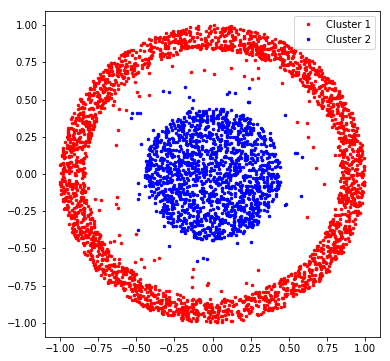

In [23]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 130
threshold = 0
# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, threshold)

# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)

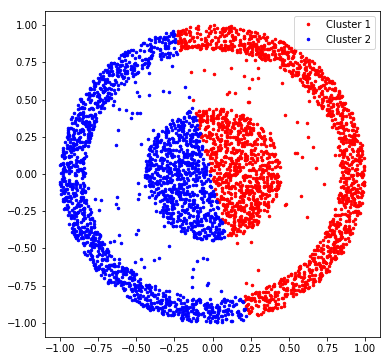

In [9]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [12]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)
print(fea.shape)
print(gnd.shape)
print(gnd)

(1319, 14964)
(1319,)
[ 4  4  4 ... 13 13 13]


In [24]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
# YOUR CODE HERE
# begin answer

k = 80
W = constructW(fea, k=k)

K = len(np.unique(gnd))

sm_acc = 0
sm_minfo = 0
sm_acc_km = 0
sm_minfo_km = 0
iters = 8
for i in range(iters):
    
    ret = spectral(W, K)
    ret = bestMap(gnd, ret)
    acc = np.sum(ret == gnd) / len(gnd)
    sm_acc += acc
    minfo = MutualInfo(gnd, ret)
    sm_minfo += minfo
    
    
    ret = kmeans(np.array(fea.todense()), K)
    ret = bestMap(gnd, ret)
    acc_km = np.sum(gnd == ret)/len(gnd)
    sm_acc_km += acc_km
    minfo_km = MutualInfo(gnd, ret)
    sm_minfo_km += minfo_km
print("spectral accuracy: {}".format(sm_acc / iters))
print("spectral mutual info: {}".format(sm_minfo / iters))
print("kmeans accuracy: {}".format(sm_acc_km / iters))
print("kmeans mutual info: {}".format(sm_minfo_km / iters))
# end answer

spectral accuracy: 0.5700341167551175
spectral mutual info: 0.5689778019765478
kmeans accuracy: 0.4841736163760425
kmeans mutual info: 0.29615827392821137
